In [3]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings(action='ignore')

In [4]:
df = pd.read_csv("modified_0420.csv")

In [6]:
df_X = df.drop(columns=['loan_status', 'Unnamed: 0'])
df_y = df['new_loan_status']

In [7]:
df_X = df_X.astype('float32')
X_train, X_validation, y_train, y_validation = train_test_split(df_X, df_y, test_size = 0.2, random_state = 30)

In [8]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)
print(cross_val_score(model, X_train, y_train, cv=5))

[0.79765172 0.79766277 0.79766277 0.79773457 0.79824818]


In [9]:
train_y_predict = model.predict(X_train)
valid_y_predict = model.predict(X_validation)

In [28]:
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_validation, y_validation)))
print("훈련 세트 recall: {:.3f}".format(recall_score(y_train, train_y_predict)))
print("테스트 세트 recall: {:.3f}".format(recall_score(y_validation, valid_y_predict)))
print("훈련 세트 precision: {:.3f}".format(precision_score(y_train, train_y_predict)))
print("테스트 세트 precision: {:.3f}".format(precision_score(y_validation, valid_y_predict)))
print("훈련 세트 f1: {:.3f}".format(f1_score(y_train, train_y_predict)))
print("테스트 세트 f1: {:.3f}".format(f1_score(y_validation, valid_y_predict)))

훈련 세트 정확도: 0.798
테스트 세트 정확도: 0.798
훈련 세트 recall: 0.001
테스트 세트 recall: 0.000
훈련 세트 precision: 0.990
테스트 세트 precision: 0.714
훈련 세트 f1: 0.001
테스트 세트 f1: 0.000


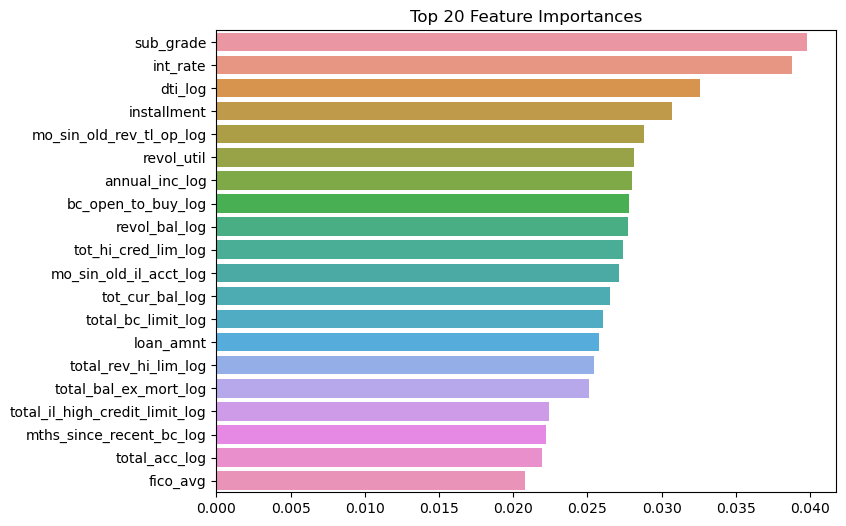

In [10]:
importance = model.feature_importances_
importances = pd.Series(importance, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt. figure (figsize=(8,6))
plt. title('Top 20 Feature Importances') 
sns.barplot(x=top20, y=top20.index)
plt.show()